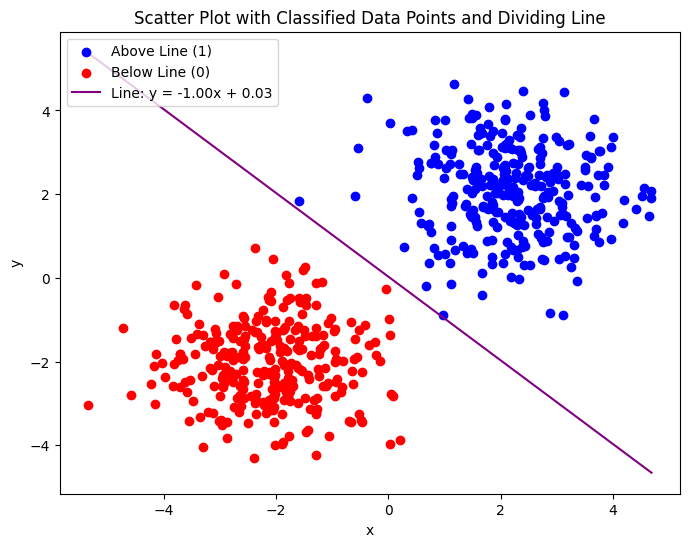

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("unlabelled_data.csv", header=None, names=["x", "y"])

x_mean = data["x"].mean()
y_mean = data["y"].mean()


k = -1  
m = y_mean  

def classify_point(x, y, k, m):
    return 1 if y > (k * x + m) else 0


data["label"] = data.apply(lambda row: classify_point(row["x"], row["y"], k, m), axis=1)


data.to_csv("labelled_data.csv", index=False)


x_values = np.array([data["x"].min(), data["x"].max()])
y_values = k * x_values + m


plt.figure(figsize=(8, 6))
plt.scatter(data[data["label"] == 1]["x"], data[data["label"] == 1]["y"], color="blue", label="Above Line (1)")
plt.scatter(data[data["label"] == 0]["x"], data[data["label"] == 0]["y"], color="red", label="Below Line (0)")
plt.plot(x_values, y_values, color="purple", label=f"Line: y = {k:.2f}x + {m:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot with Classified Data Points and Dividing Line")
plt.legend()
plt.show()
